In [1]:
#use this code to download dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jishnukoliyadan/vibration-analysis-on-rotating-shaft")

print("Path to dataset files:", path)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pickle

In [7]:
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv('C:/Users/Harsh/model training/0D.csv')

In [4]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26423295 entries, 0 to 26423294
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   V_in          float64
 1   Measured_RPM  float64
 2   Vibration_1   float64
 3   Vibration_2   float64
 4   Vibration_3   float64
dtypes: float64(5)
memory usage: 1008.0 MB
None
               V_in  Measured_RPM   Vibration_1   Vibration_2   Vibration_3
count  2.642330e+07  2.642330e+07  2.642330e+07  2.642330e+07  2.642330e+07
mean   5.992249e+00 -3.572305e+04  1.981370e-03  2.713846e-03  4.202591e-03
std    2.329660e+00  2.987905e+06  6.284235e-02  8.682009e-02  6.599321e-02
min    0.000000e+00 -2.400000e+08 -1.067495e-01 -2.067244e-01 -3.653050e-02
25%    4.000000e+00  1.052549e+03 -1.059771e-03 -1.188517e-03  1.739263e-03
50%    6.000000e+00  1.483102e+03  6.246567e-04  6.520748e-04  2.712011e-03
75%    8.000000e+00  1.906805e+03  2.528429e-03  2.536774e-03  3.825426e-03
max    1.000000e+01  2.376685e+03  7.8056

Missing values:
 V_in            0
Measured_RPM    0
Vibration_1     0
Vibration_2     0
Vibration_3     0
dtype: int64

Anomaly Count:
 Anomaly_Score
 1    26155007
-1      264192
Name: count, dtype: int64


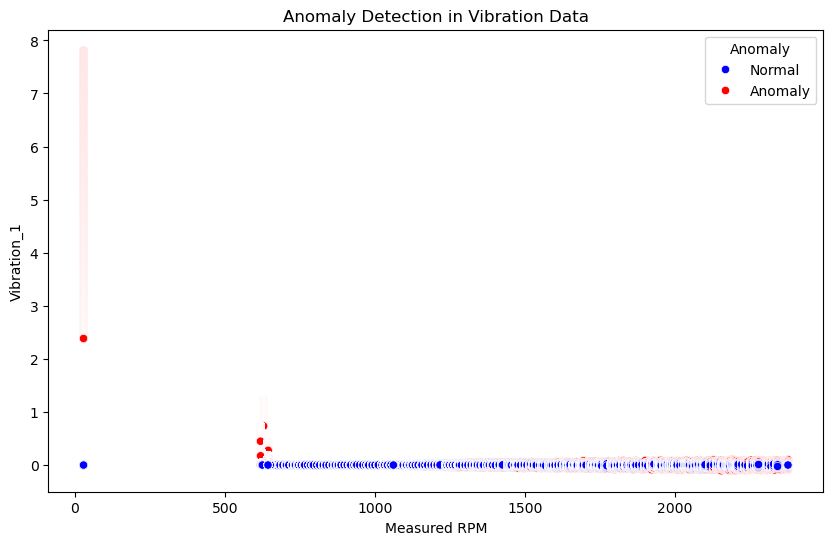


Processed dataset saved as 'processed_anomalies.csv'


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load Dataset (Replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv("C:/Users/Harsh/model training/0D.csv")

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop missing values (if any)
df.dropna(inplace=True)

# Drop extreme outliers (RPM values below 0 seem incorrect)
df = df[df["Measured_RPM"] > 0]

# Features for model training
features = ["V_in", "Measured_RPM", "Vibration_1", "Vibration_2", "Vibration_3"]

# Normalize Features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
df["Anomaly_Score"] = iso_forest.fit_predict(df_scaled)  # -1 = anomaly, 1 = normal

# Count Anomalies
anomaly_count = df["Anomaly_Score"].value_counts()
print("\nAnomaly Count:\n", anomaly_count)

# Add Anomaly Column
df["Anomaly"] = df["Anomaly_Score"].apply(lambda x: "Anomaly" if x == -1 else "Normal")

# Plot Anomalies in RPM
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Measured_RPM", y="Vibration_1", hue="Anomaly", palette={"Normal": "blue", "Anomaly": "red"})
plt.title("Anomaly Detection in Vibration Data")
plt.xlabel("Measured RPM")
plt.ylabel("Vibration_1")
plt.show()

# Save Processed Dataset
df.to_csv("processed_anomalies.csv", index=False)
print("\nProcessed dataset saved as 'processed_anomalies.csv'")


Missing values:
 V_in            0
Measured_RPM    0
Vibration_1     0
Vibration_2     0
Vibration_3     0
dtype: int64

Anomaly Count:
 Anomaly_Score
 1    25890815
-1      528384
Name: count, dtype: int64


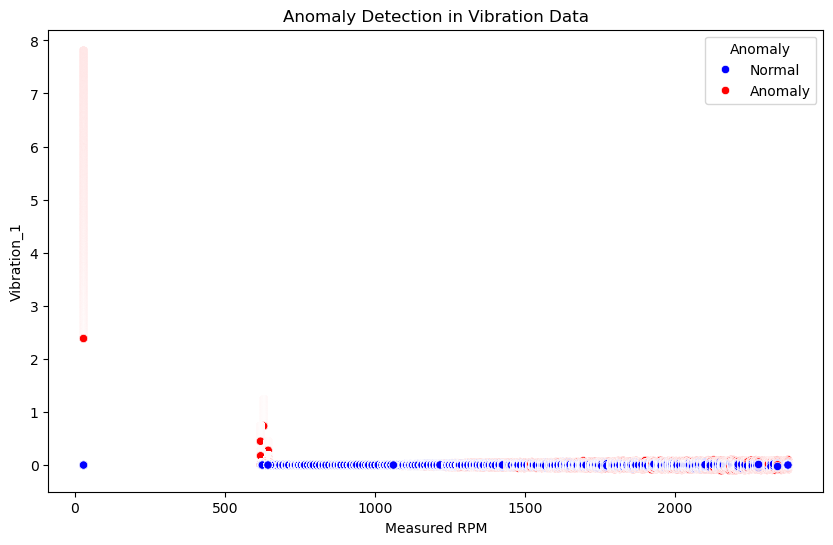


Processed dataset saved as 'processed_anomalies.csv'


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load Dataset (Replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv("C:/Users/Harsh/model training/0D.csv")

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop missing values (if any)
df.dropna(inplace=True)

# Drop extreme outliers (RPM values below 0 seem incorrect)
df = df[df["Measured_RPM"] > 0]

# Features for model training
features = ["V_in", "Measured_RPM", "Vibration_1", "Vibration_2", "Vibration_3"]

# Normalize Features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.02, random_state=42, n_jobs=-1)
df["Anomaly_Score"] = iso_forest.fit_predict(df_scaled)  # -1 = anomaly, 1 = normal

# Count Anomalies
anomaly_count = df["Anomaly_Score"].value_counts()
print("\nAnomaly Count:\n", anomaly_count)

# Add Anomaly Column
df["Anomaly"] = df["Anomaly_Score"].apply(lambda x: "Anomaly" if x == -1 else "Normal")

# Plot Anomalies in RPM
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Measured_RPM", y="Vibration_1", hue="Anomaly", palette={"Normal": "blue", "Anomaly": "red"})
plt.title("Anomaly Detection in Vibration Data")
plt.xlabel("Measured RPM")
plt.ylabel("Vibration_1")
plt.show()

# Save Processed Dataset
df.to_csv("processed_anomalies.csv", index=False)
print("\nProcessed dataset saved as 'processed_anomalies.csv'")


Missing values:
 V_in            0
Measured_RPM    0
Vibration_1     0
Vibration_2     0
Vibration_3     0
dtype: int64

Anomaly Count:
 Anomaly_Score
 1    6751681
-1     137790
Name: count, dtype: int64


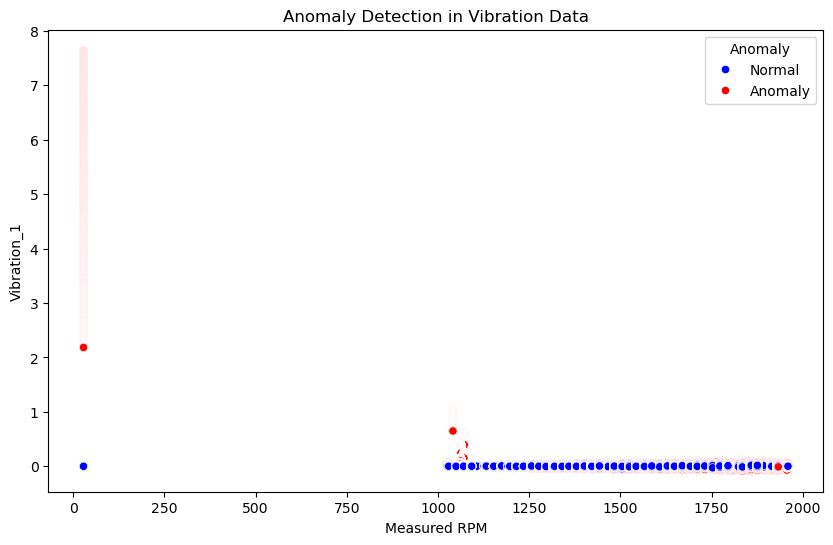


Processed dataset saved as 'processed_anomalies.csv'


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Load Dataset (Replace 'your_dataset.csv' with your actual dataset file)
df = pd.read_csv("C:/Users/Harsh/model training/0E.csv")

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop missing values (if any)
df.dropna(inplace=True)

# Drop extreme outliers (RPM values below 0 seem incorrect)
df = df[df["Measured_RPM"] > 0]

# Features for model training
features = ["V_in", "Measured_RPM", "Vibration_1", "Vibration_2", "Vibration_3"]

# Normalize Features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# Train Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.02, random_state=42, n_jobs=-1)
df["Anomaly_Score"] = iso_forest.fit_predict(df_scaled)  # -1 = anomaly, 1 = normal

# Count Anomalies
anomaly_count = df["Anomaly_Score"].value_counts()
print("\nAnomaly Count:\n", anomaly_count)

# Add Anomaly Column
df["Anomaly"] = df["Anomaly_Score"].apply(lambda x: "Anomaly" if x == -1 else "Normal")

# Plot Anomalies in RPM
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Measured_RPM", y="Vibration_1", hue="Anomaly", palette={"Normal": "blue", "Anomaly": "red"})
plt.title("Anomaly Detection in Vibration Data")
plt.xlabel("Measured RPM")
plt.ylabel("Vibration_1")
plt.show()

# Save Processed Dataset
df.to_csv("processed_anomalies.csv", index=False)
print("\nProcessed dataset saved as 'processed_anomalies.csv'")
